In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.svm import SVC

In [3]:
x, y = make_blobs(n_samples=1000, centers=2, cluster_std=1, random_state=0)

In [4]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=150, random_state=0)

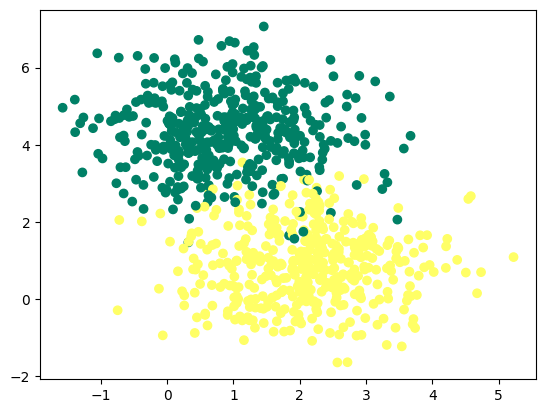

In [5]:
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, cmap='summer')
#store the first cluster in the first index position, store second cluster in the second.

In [6]:
svc=SVC(kernel='linear')
svc.fit(train_x, train_y)

SVC(kernel='linear')

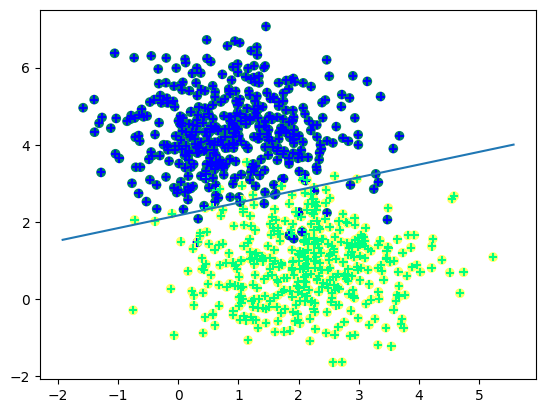

In [7]:
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, cmap='summer')

ax = plt.gca()
xlim = ax.get_xlim()

ax.scatter(train_x[:,0], train_x[:,1], c=train_y, cmap='winter', marker = '+')

w = svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(xlim[0],xlim[1])
yy = a * xx - (svc.intercept_[0]/w[1])

plt.plot(xx,yy)
plt.show()

In [8]:
pred_y = svc.predict(test_x)

In [9]:
cm = confusion_matrix(test_y, pred_y)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[61  8]
 [ 4 77]]

True Positives(TP) =  61

True Negatives(TN) =  77

False Positives(FP) =  8

False Negatives(FN) =  4


<AxesSubplot: >

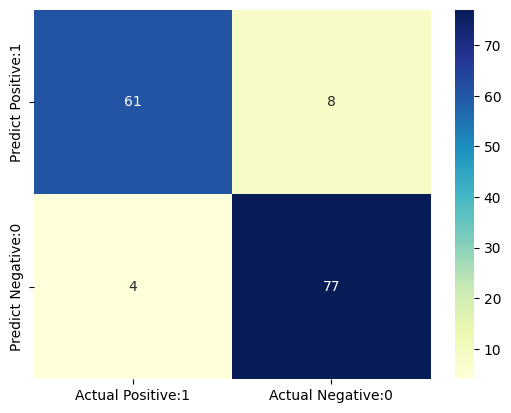

In [10]:
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [11]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        69
           1       0.91      0.95      0.93        81

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



In [12]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [13]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9200


In [14]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0800


In [15]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8841


In [16]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9385


In [17]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9385


In [18]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0941


In [19]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9059
